In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [3]:
import DataHandling as dh

In [4]:
model_data = pd.read_excel(r"Model_final.xlsx",engine = "openpyxl").drop(columns = "Unnamed: 0")
model_data.head()

,Product_Name,Form,Tender_Id,Tender_Type,Client,Region,Start_Date,End_Date,Tender_Submission_Date,Winner,...,AVAS PHARMACEUTICALS S.r.l._Win_status,Ethypharm Italy S.r.l_Win_status,Sanofi S.r.l._Win_status,Gilead Sciences S.r.l._Win_status,KRKA Farmaceutici Milano S.r.l._Win_status,Bayer S.p.A._Win_status,Proximity_Delivery,Start_End_Date_Diff,#Participant,#Months_G.E
0,CINACALCET 30MG,OSD,50328,Area vasta,ASUR MARCHE,Marche,2015-06-01,2021-12-31,2015-03-23,Amgen S.r.l.,...,0,0,0,0,0,0,70,2405,1,0.0
1,CINACALCET 30MG,OSD,60914,Regionale,REGIONE SICILIANA - ASSESSORATO DELLA SALUTE,Sicilia,2017-06-05,2021-12-30,2016-11-21,Amgen S.r.l.,...,0,0,0,0,0,0,196,1669,1,0.0
2,CINACALCET 30MG,OSD,62643,Regionale,REGIONE TOSCANA,Toscana,2017-04-01,2021-06-30,2017-03-06,Amgen S.r.l.,...,0,0,0,0,0,0,26,1551,1,0.0
3,CINACALCET 30MG,OSD,62910,Regionale,SO.RE.SA. SpA,Campania,2017-06-05,2021-06-05,2017-04-20,Amgen S.r.l.,...,0,0,0,0,0,0,46,1461,1,0.0
4,CINACALCET 30MG,OSD,64692,Regionale,ENTE GESTIONE ACCENTRATA SERVIZI - CHIUSO VEDI...,Friuli Venezia Giulia,2018-01-24,2021-07-24,2017-06-28,Amgen S.r.l.,...,0,0,0,0,0,0,210,1277,1,0.0


In [5]:
encode_model_data = dh.encoded_df(model_data)
encode_model_data.head()

,Product_Name,Form,Tender_Id,Tender_Type,Client,Region,Start_Date,End_Date,Tender_Submission_Date,Winner,...,Proximity_Delivery,Start_End_Date_Diff,#Participant,#Months_G.E,Participant_Club,Genric_Entry_Club,Proximity_Club,Client_Club,Tender_Duration_Club,Identifier
0,CINACALCET 30MG,OSD,50328,Area vasta,ASUR MARCHE,Marche,2015-06-01,2021-12-31,2015-03-23,Amgen S.r.l.,...,70,2405,1,0.0,Low Competition,High,mid,Normal,Long,CINACALCET 30MG50328
1,CINACALCET 30MG,OSD,60914,Regionale,REGIONE SICILIANA - ASSESSORATO DELLA SALUTE,Sicilia,2017-06-05,2021-12-30,2016-11-21,Amgen S.r.l.,...,196,1669,1,0.0,Low Competition,High,mid,Top10,Long,CINACALCET 30MG60914
2,CINACALCET 30MG,OSD,62643,Regionale,REGIONE TOSCANA,Toscana,2017-04-01,2021-06-30,2017-03-06,Amgen S.r.l.,...,26,1551,1,0.0,Low Competition,High,low,Normal,Long,CINACALCET 30MG62643
3,CINACALCET 30MG,OSD,62910,Regionale,SO.RE.SA. SpA,Campania,2017-06-05,2021-06-05,2017-04-20,Amgen S.r.l.,...,46,1461,1,0.0,Low Competition,High,low,Top10,Long,CINACALCET 30MG62910
4,CINACALCET 30MG,OSD,64692,Regionale,ENTE GESTIONE ACCENTRATA SERVIZI - CHIUSO VEDI...,Friuli Venezia Giulia,2018-01-24,2021-07-24,2017-06-28,Amgen S.r.l.,...,210,1277,1,0.0,Low Competition,High,mid,Normal,Long,CINACALCET 30MG64692


<AxesSubplot:xlabel='Winning_Price', ylabel='Density'>

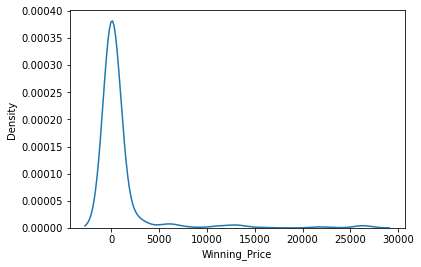

In [8]:
import seaborn as sns
sns.kdeplot(encode_model_data["Winning_Price"])

In [9]:
encode_model_data.shape

(842, 139)

In [10]:
import numpy as np
from scipy import stats
#encode_model_data[(np.abs(stats.zscore(encode_model_data)) < 3).all(axis=1)]

In [22]:
#encode_model_data[(np.abs(stats.zscore(encode_model_data)) < 3).all(axis=1)].shape

In [7]:
def price_data_processor(df,inclusion_exclusion = True,DRL_Participation=False,DRL_Win=False,visualize_numeric=False,price="Winner"):
    data = dh.encoded_df(df)
    if DRL_Participation:
        data = df[df["Dr Reddys S.r.l.Pr.Status"]==1]
    if DRL_Win:
        data = df[df["Dr Reddys S.r.l._Win_status"]==1]
    if inclusion_exclusion:
        data = data[(data["Proximity_Delivery"]>0) &(data["#Months_G.E"]>0)]
    #data = data.dropna(subset=["Previous_Winning_Price"])
    data = data.fillna(0)
    model_col = ["Identifier","Dr Reddys S.r.l._Win_status","Form","Region","Tender_Type","Client","#Participant","Winning_Price",
            "Proximity_Delivery","Start_End_Date_Diff","Previous_Winning_Price","#Months_G.E","Dr Reddys S.r.l."]
    data = data[model_col]
    data["Region"] = data["Region"].apply(dh.data_processor_region)
    data["Client"] = data["Client"].apply(dh.data_processor_client)
    data["Tender_Type"] = data["Tender_Type"].apply(dh.data_processor_tender_type)
    data["Form"] = data["Form"].apply(dh.data_processor_form)
    data["#Participant"] = data["#Participant"]#.apply(dh.data_processor_participant)
    data["Proximity_Delivery"] = (data["Proximity_Delivery"]/30)
    data["Start_End_Date_Diff"] = (data["Start_End_Date_Diff"]/356)
    data["#Months_G.E"] = (data["#Months_G.E"]/30) 
    data.columns=["Identifier","DRL_Win_Flag","Form","Region"," Tender_Type","Client","#Participant","Winning_Price",
            "Proximity_Delivery","Tender_Duration","Previous_Winning_Price","#Months_G.E","DRL_Bid_price"]
    if visualize_numeric:
        visualise_winprob(data)
    print(data.shape)
    return data

In [8]:
def previous_winning_price(df1):
    df=df1
    prod_names = df["Product_Name"].unique()
    df_w=pd.DataFrame()
    for i in prod_names:
        prod_df = df[df["Product_Name"]==i]
        winning_pr = list(prod_df["Winning_Price"])
        prev_win_pr = [np.nan]
        for i in range(len(winning_pr)-1):
            prev_win_pr.append(winning_pr[i])
        prod_df["Previous_Winning_Price"]=prev_win_pr
        df_w = pd.concat([df_w,prod_df])
    return df_w

In [9]:
encode_model_data = dh.encoded_df(model_data)
encode_model_data = previous_winning_price(encode_model_data)
#encode_model_data.dropna(subset=["Previous_Winning_Price"],inplace=True)
encode_model_data.shape

(842, 140)

In [10]:
prods = encode_model_data["Product_Name"].unique()
df_test = pd.DataFrame()
for i in prods:
    prod_df = encode_model_data[encode_model_data["Product_Name"]==i]
    prod_df.dropna(subset=["Previous_Winning_Price"],inplace=True)
    prod_df = prod_df[prod_df["Previous_Winning_Price"]>0]
    prod_df.dropna(subset=["Previous_Winning_Price"],inplace=True)
    prod_df["Pct_drop"] = prod_df["Previous_Winning_Price"].pct_change()
    prod_df.dropna(subset=["Pct_drop"],inplace=True)
    df_test = pd.concat([df_test,prod_df])
    df_test=df_test[df_test["Pct_drop"]!=0]
df_test

,Product_Name,Form,Tender_Id,Tender_Type,Client,Region,Start_Date,End_Date,Tender_Submission_Date,Winner,...,#Participant,#Months_G.E,Participant_Club,Genric_Entry_Club,Proximity_Club,Client_Club,Tender_Duration_Club,Identifier,Previous_Winning_Price,Pct_drop
3,CINACALCET 30MG,OSD,62910,Regionale,SO.RE.SA. SpA,Campania,2017-06-05,2021-06-05,2017-04-20,Amgen S.r.l.,...,1,0.0,Low Competition,High,low,Top10,Long,CINACALCET 30MG62910,5.86607,-0.050029
16,CINACALCET 30MG,OSD,82514,Multi regione,Società di Committenza Regione Piemonte SpA - ...,Piemonte,2020-04-29,2022-09-30,2020-04-10,Amgen S.r.l.,...,1,0.0,Low Competition,High,low,Top10,Short,CINACALCET 30MG82514,2.71036,-0.537960
17,CINACALCET 30MG,OSD,83908,Multi regione,REGIONE LAZIO,Lazio,2020-07-22,2023-07-21,2020-06-03,EG S.p.A.,...,3,0.0,High Competition,High,low,Top10,Short,CINACALCET 30MG83908,5.86607,1.164314
18,CINACALCET 30MG,OSD,84548,Regionale,SO.RE.SA. SpA,Campania,2020-07-07,2024-07-07,2020-06-10,EG S.p.A.,...,1,7.0,Low Competition,High,low,Top10,Long,CINACALCET 30MG84548,0.46800,-0.920219
19,CINACALCET 30MG,OSD,84724,Regionale,ARCS AZIENDA REGIONALE DI COORDINAMENTO PER LA...,Friuli Venezia Giulia,2020-06-25,2021-07-24,2020-06-17,EG S.p.A.,...,4,14.0,High Competition,High,low,Normal,Short,CINACALCET 30MG84724,0.36800,-0.213675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,SORAFENIB 200MG,OSD,94460,Regionale,ASUR MARCHE,Marche,2022-01-01,2025-12-31,2021-09-28,EG S.p.A.,...,5,113.0,High Competition,High,mid,Normal,Long,SORAFENIB 200MG94460,1.57029,-0.915666
838,SORAFENIB 200MG,OSD,96297,Multi regione,Società di Committenza Regione Piemonte SpA - ...,Piemonte,2021-10-11,2022-09-30,2021-10-11,Medac Pharma S.r.l.,...,5,126.0,High Competition,High,low,Top10,Short,SORAFENIB 200MG96297,3.00000,0.910475
839,SORAFENIB 200MG,OSD,97396,Locale,IRCCS AOU SAN MARTINO,Liguria,2021-11-23,2023-05-30,2021-11-23,Mylan Italia Srl,...,5,169.0,High Competition,High,low,Normal,Short,SORAFENIB 200MG97396,0.83000,-0.723333
840,SORAFENIB 200MG,OSD,98102,Regionale,REGIONE SICILIANA - ASSESSORATO DELLA SALUTE,Sicilia,2021-12-21,2024-12-31,2021-12-21,Medac Pharma S.r.l.,...,7,197.0,High Competition,Mid,low,Top10,Long,SORAFENIB 200MG98102,1.10500,0.331325


In [11]:
modelreg_data = price_data_processor(encode_model_data,inclusion_exclusion=False) 

(842, 13)


In [59]:
encode_model_data.dropna(subset=["Previous_Winning_Price"],inplace=True)
#(np.abs(encode_model_data["Previous_Winning_Price"].pct_change())).drop
encode_model_data.shape

(802, 140)

In [60]:
encode_model_data["Price_drop"] = encode_model_data["Previous_Winning_Price"].pct_change()

In [61]:
encode_model_data.dropna(subset=["Price_drop"],inplace=True)
encode_model_data.shape

(801, 141)

## Linear Regression on DRL Win Dataset

In [170]:
modelreg_data1 = price_data_processor(encode_model_data,DRL_Win=True)
modelreg_data1.head()

(70, 13)


,Identifier,DRL_Win_Flag,Form,Region,Tender_Type,Client,#Participant,Winning_Price,Proximity_Delivery,Tender_Duration,Previous_Winning_Price,#Months_G.E,DRL_Bid_price
21,CINACALCET 30MG85386,1,1,3,2,1,1,0.67860,0.533333,1.794944,0.41587,1.100000,0.67860
48,CINACALCET 60MG85386,1,1,3,2,1,1,1.28570,0.533333,1.794944,0.54609,1.100000,1.28570
76,CINACALCET 90MG85386,1,1,3,2,1,1,2.42860,0.533333,1.794944,0.57986,1.100000,2.42860
93,AMBRISENTAN 10MG88094,1,1,4,1,2,2,9.81212,0.333333,3.584270,19.85698,0.700000,9.81212
97,AMBRISENTAN 10MG91896,1,1,2,1,1,2,2.41221,0.866667,1.876404,2.87708,5.466667,2.41221


In [171]:
independent_variables=['Form', 'Region', ' Tender_Type',
       'Client', '#Participant','Proximity_Delivery',
       'Tender_Duration', 'Previous_Winning_Price', '#Months_G.E']
len(independent_variables)

9

In [172]:
X_var = modelreg_data1[independent_variables]
Y = list(modelreg_data["Winning_Price"])

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
norm_X = X_var.apply(lambda iterator: ((iterator-iterator.mean())/iterator.std()).round(2))
norm_X
vif_data = pd.DataFrame()
vif_data["Feature"]=norm_X.columns
vif_data["VIF"] = [np.round(variance_inflation_factor(X_var.values , i),2) for i in range(len(norm_X.columns))]
vif_data

,Feature,VIF
0,Form,17.76
1,Region,20.10
2,Tender_Type,11.26
3,Client,12.57
4,#Participant,9.01
5,Proximity_Delivery,3.21
6,Tender_Duration,9.34
7,Previous_Winning_Price,1.66
8,#Months_G.E,2.88


In [174]:
np.linalg.cond(norm_X)

2.693555226549483

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_var, Y, test_size=0.33, random_state=42)

In [177]:
import sklearn
#sklearn.metrics.SCORERS.keys()

In [178]:
from sklearn.linear_model import LinearRegression
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train, np.log(y_train), scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
np.mean(scores)

-1.4813353655022314

In [236]:
import statsmodels.regression.linear_model as sml
ols = sml.OLS(endog=np.log(y_train),exog=X_train,hasconst=True).fit()
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                 OLS               Adj. R-squared:      0.840   
Dependent Variable:    y                 AIC:                 167.1848
Date:                  2022-06-21 17:37  BIC:                 183.6425
No. Observations:      46                Log-Likelihood:      -74.592 
Df Model:              8                 F-statistic:         30.63   
Df Residuals:          37                Prob (F-statistic):  4.62e-14
R-squared:             0.869             Scale:               1.8645  
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Form                    4.8754   0.4969  9.8113 0.0000  3.8686  5.8822
Region                 -0.6678   0.2982 -2.2391 0.0312 -1.2720 -0.0635
 Tender_Type           -0.3660   0.5053 -0.7243 0.4734 -1.3898  0.6578
Client                  0.9939   0.4270  2.3275 0.0255  0.1287  1.8591
#Participant           -1.4588   0.3939 -3.7031 0.0007 -2.2570 -0.6606
Proximity_Delivery     -0.2568   0.1086 -2.3658 0.0233 -0.4768 -0.0369
Tender_Duration        -0.1285   0.2071 -0.6203 0.5389 -0.5481  0.2912
Previous_Winning_Price  0.0002   0.0000  4.8897 0.0000  0.0001  0.0003
#Months_G.E            -0.0721   0.0190 -3.7989 0.0005 -0.1106 -0.0336
----------------------------------------------------------------------
Omnibus:                0.894          Durbin-Watson:            1.766
Prob(Omnibus):          0.640          Jarque-Bera (JB):         0.864
Skew:                   -0.122         Prob(JB):                 0.649
Kurtosis:               2.375          Condition No.:            17316
======================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [237]:
y_pred=np.exp(ols.predict(X_test))
mape(y_test,y_pred)

2.000808536385686

In [194]:
y_pred

184     3454.385007
21         3.415854
360       58.182024
97         1.481345
440       26.176141
178    13842.730187
136        0.156792
227      246.854606
316      783.280134
143        0.026964
215     1347.610357
135        0.384522
762     1753.408827
101        0.402847
688       14.021987
205     4846.579019
461       39.739185
231      670.780400
450       30.841854
323      241.068773
165        5.154510
228      463.438370
289      765.352258
203    27936.417558
dtype: float64

array([3.45242834e+03, 3.41341588e+00, 5.82074319e+01, 1.47932380e+00,
       2.62202759e+01, 1.38424090e+04, 1.56664865e-01, 2.46794954e+02,
       7.82951451e+02, 2.69266132e-02, 1.34734219e+03, 3.84394389e-01,
       1.75387993e+03, 4.02435248e-01, 1.40328392e+01, 4.84360948e+03,
       3.97310984e+01, 6.70317527e+02, 3.08355946e+01, 2.40888107e+02,
       5.15198909e+00, 4.63758021e+02, 7.65029761e+02, 2.79249986e+04])

In [111]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [186]:
y_pred = np.round(np.exp(ols.predict(X_var)),2)
y_pred

21       2.97
48       2.97
76       2.97
93       1.33
97       1.60
        ...  
757    243.51
758    104.32
762    919.15
787      0.46
797      0.80
Length: 70, dtype: float64

In [187]:
mape(Y,y_pred)

1.6610438562676808

In [122]:
modelreg_data2 = price_data_processor(encode_model_data,DRL_Participation=True)

(207, 13)


In [198]:
modelreg_data2.columns

Index(['Identifier', 'DRL_Win_Flag', 'Form', 'Region', ' Tender_Type',
       'Client', '#Participant', 'Winning_Price', 'Proximity_Delivery',
       'Tender_Duration', 'Previous_Winning_Price', '#Months_G.E',
       'DRL_Bid_price'],
      dtype='object')

In [199]:
ind_col1 = ["DRL_Win_Flag","Form","Region"," Tender_Type","Client","#Participant",
            "Proximity_Delivery","Tender_Duration","Previous_Winning_Price","#Months_G.E",]
len(ind_col1)

10

In [223]:
X_var1= modelreg_data2[independent_variables]
X_var1.shape

(207, 9)

In [224]:
Y1 = list(modelreg_data2["Winning_Price"])
len(Y1)

207

In [225]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_var1, Y1, test_size=0.33, random_state=42)

In [226]:
X_train1.shape

(138, 9)

In [232]:
ols2 = sml.OLS(endog=np.log(Y1),exog=X_var1,hasconst=True).fit()
ols2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
======================================================================
Model:                 OLS               Adj. R-squared:      0.865   
Dependent Variable:    y                 AIC:                 626.3197
Date:                  2022-06-21 17:37  BIC:                 656.3141
No. Observations:      207               Log-Likelihood:      -304.16 
Df Model:              8                 F-statistic:         165.9   
Df Residuals:          198               Prob (F-statistic):  1.85e-83
R-squared:             0.870             Scale:               1.1564  
----------------------------------------------------------------------
                        Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Form                    3.8465   0.1468 26.1999 0.0000  3.5570  4.1360
Region                 -0.2848   0.1161 -2.4524 0.0151 -0.5138 -0.0558
 Tender_Type           -0.1767   0.1903 -0.9282 0.3544 -0.5520  0.1986
Client                  0.3783   0.1636  2.3120 0.0218  0.0556  0.7009
#Participant           -1.3771   0.1765 -7.8007 0.0000 -1.7253 -1.0290
Proximity_Delivery      0.0243   0.0318  0.7655 0.4449 -0.0383  0.0870
Tender_Duration        -0.2212   0.0677 -3.2662 0.0013 -0.3548 -0.0877
Previous_Winning_Price  0.0003   0.0000 12.0250 0.0000  0.0002  0.0003
#Months_G.E            -0.0338   0.0061 -5.5232 0.0000 -0.0459 -0.0217
----------------------------------------------------------------------
Omnibus:                 4.541         Durbin-Watson:            1.045
Prob(Omnibus):           0.103         Jarque-Bera (JB):         4.219
Skew:                    0.341         Prob(JB):                 0.121
Kurtosis:                3.155         Condition No.:            10680
======================================================================
* The condition number is large (1e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [233]:
y_pred2 = np.exp(ols2.predict(X_test1))

In [234]:
mape(y_test1,y_pred2)

0.9501444242711877

In [235]:
mape(Y1,np.exp(ols2.predict(X_var1)))

1.1424827209898143

In [206]:
model2_pred = np.exp(ols2.predict(X_var1))
len(model2_pred)

207

In [214]:
modelreg_data2["Linear Prediction"]=model2_pred

In [215]:
modelreg_data2.to_excel(r"PricePred.xlsx")

In [220]:
pred_test=ols.predict(X_var1[independent_variables])

In [222]:
sum(pred_test>0)

146

In [240]:
sum(ols.predict(X_var1)>0)

146

<AxesSubplot:xlabel='Winning_Price', ylabel='Density'>

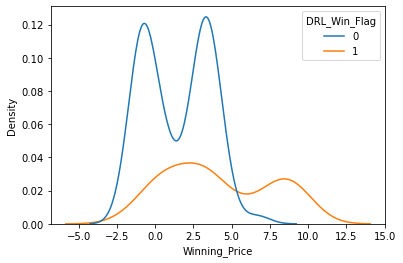

In [249]:
import seaborn as sns
sns.kdeplot(data=modelreg_data2, x=np.log(modelreg_data2["Winning_Price"]),hue="DRL_Win_Flag")

<AxesSubplot:xlabel='Winning_Price', ylabel='Density'>

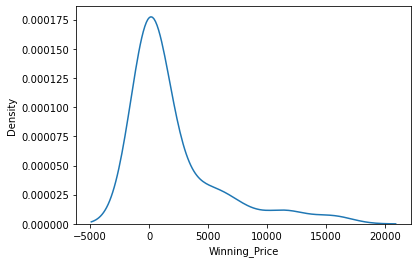

In [252]:
import matplotlib.pyplot as plt

sns.kdeplot(data=modelreg_data2[modelreg_data2["DRL_Win_Flag"]==1], x="Winning_Price")

<AxesSubplot:xlabel='Winning_Price', ylabel='Density'>

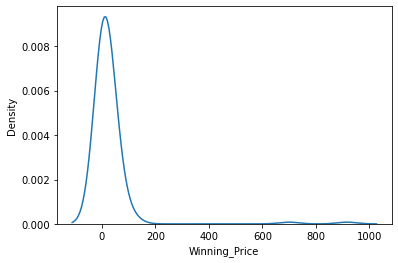

In [253]:
sns.kdeplot(data=modelreg_data2[modelreg_data2["DRL_Win_Flag"]==0], x="Winning_Price")

In [254]:
modelreg_data2.to_excel("Regressionmodeldata.xlsx")

<AxesSubplot:xlabel='Winning_Price', ylabel='Density'>

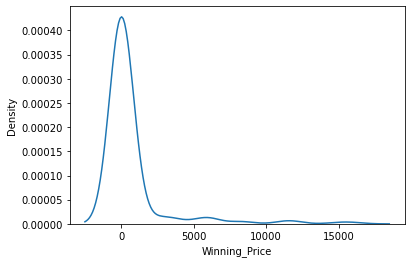

In [255]:
sns.kdeplot(modelreg_data2["Winning_Price"])

Text(0.5, 0, 'Proximity Delivery')

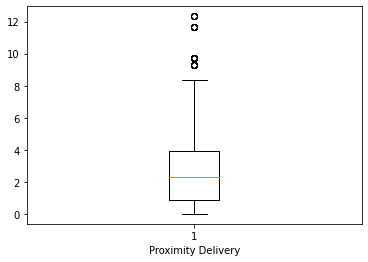

In [280]:
x=encode_model_data["Proximity_Delivery"]/30
plt.boxplot(x)
plt.xlabel("Proximity Delivery")
#sns.kdeplot(x)
#plt.vlines(x=6,ymin=0,ymax=0.2,color="orange")
#plt.title("Outlier Removal in Proximity Delivery")

<AxesSubplot:xlabel='Proximity_Delivery', ylabel='Density'>

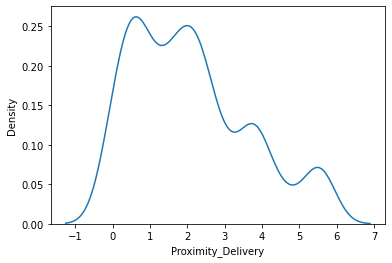

In [278]:
sns.kdeplot(x[x<6])

<AxesSubplot:xlabel='Proximity_Delivery', ylabel='Density'>

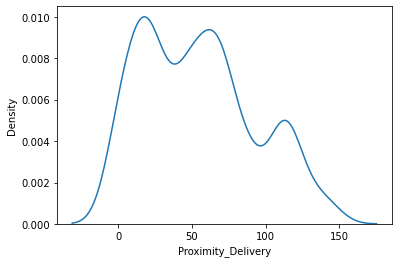

In [267]:
sns.kdeplot(encode_model_data[encode_model_data["Proximity_Delivery"]<150]["Proximity_Delivery"])

In [281]:
encode_model_data.columns

Index(['Product_Name', 'Form', 'Tender_Id', 'Tender_Type', 'Client', 'Region',
       'Start_Date', 'End_Date', 'Tender_Submission_Date', 'Winner',
       ...
       'Start_End_Date_Diff', '#Participant', '#Months_G.E',
       'Participant_Club', 'Genric_Entry_Club', 'Proximity_Club',
       'Client_Club', 'Tender_Duration_Club', 'Identifier',
       'Previous_Winning_Price'],
      dtype='object', length=140)

<AxesSubplot:xlabel='Dr Reddys S.r.l._Win_status', ylabel='Proximity_Delivery'>

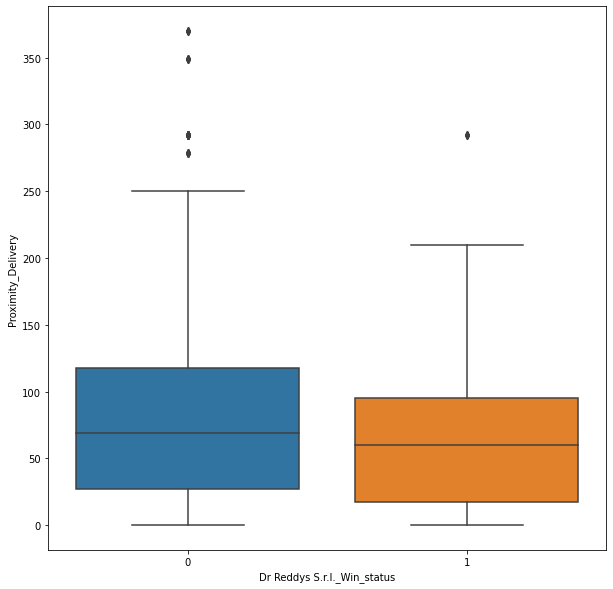

In [287]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Dr Reddys S.r.l._Win_status", y="Proximity_Delivery", data=encode_model_data)

<AxesSubplot:xlabel='Dr Reddys S.r.l._Win_status', ylabel='#Months_G.E'>

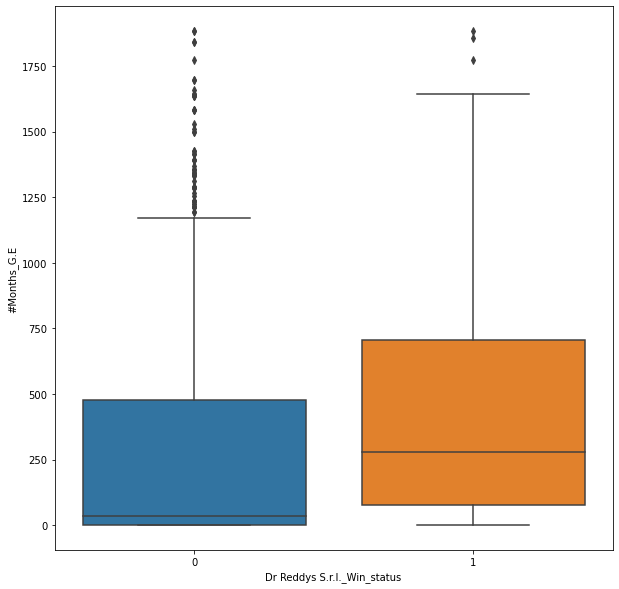

In [288]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Dr Reddys S.r.l._Win_status", y="#Months_G.E", data=encode_model_data)

<AxesSubplot:xlabel='Dr Reddys S.r.l._Win_status', ylabel='Previous_Winning_Price'>

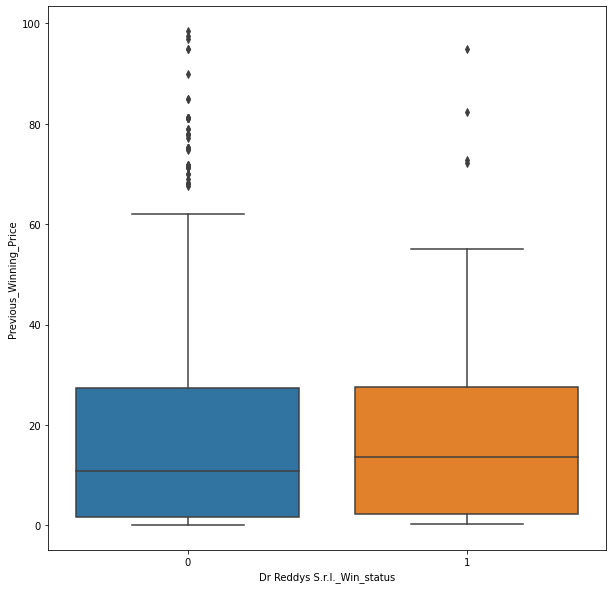

In [293]:
new = encode_model_data[encode_model_data["Previous_Winning_Price"]<100]
plt.figure(figsize=(10,10))
sns.boxplot(x="Dr Reddys S.r.l._Win_status", y="Previous_Winning_Price", data=new)

<AxesSubplot:xlabel='Dr Reddys S.r.l._Win_status', ylabel='Start_End_Date_Diff'>

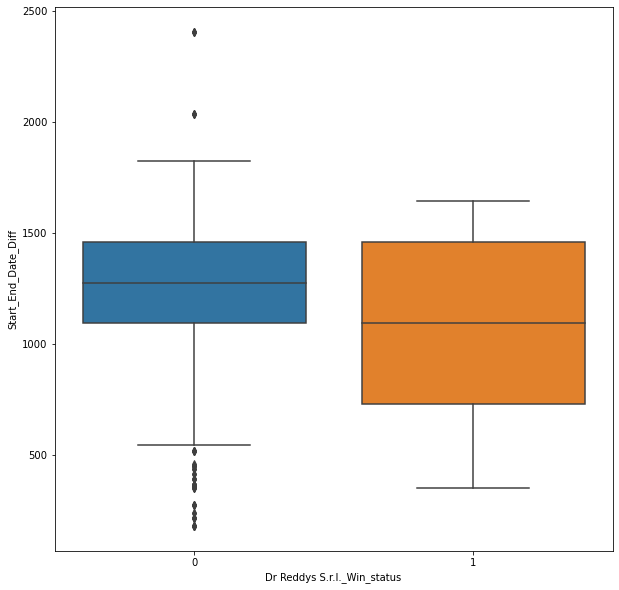

In [294]:
new = encode_model_data[encode_model_data["Previous_Winning_Price"]<100]
plt.figure(figsize=(10,10))
sns.boxplot(x="Dr Reddys S.r.l._Win_status", y="Start_End_Date_Diff", data=encode_model_data)

## Price Regression Model Data 

In [13]:
model1_data = price_data_processor(encode_model_data,DRL_Participation=True)
model1_data.columns

(207, 13)


Index(['Identifier', 'DRL_Win_Flag', 'Form', 'Region', ' Tender_Type',
       'Client', '#Participant', 'Winning_Price', 'Proximity_Delivery',
       'Tender_Duration', 'Previous_Winning_Price', '#Months_G.E',
       'DRL_Bid_price'],
      dtype='object')

In [14]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

## Train Test Split

### Model 1 Setup

In [15]:
X_cols = ['Form', 'Region', ' Tender_Type',
       'Client', '#Participant', 'Proximity_Delivery',
       'Tender_Duration', 'Previous_Winning_Price', '#Months_G.E']
X = model1_data[X_cols]
Y = list(model1_data["Winning_Price"])
X_train,X_test,Y_train,Y_Test = train_test_split(X,Y,test_size=0.2,random_state=1)

### Model 2 Setup

In [16]:
Y2 = list(model1_data["DRL_Bid_price"])
X_train,X_test,Y_train2,Y_Test2 = train_test_split(X,Y2,test_size=0.2,random_state=1)

### Compare robust regression algorithms on a regression dataset with outliers

In [17]:
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot

### Dictionary of model names and model objects

In [18]:
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models

In [19]:
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores

>Linear 180.516 (105.302)
>Huber nan (nan)
>RANSAC 278.047 (299.076)
>TheilSen 141.203 (117.292)


{'whiskers': [<matplotlib.lines.Line2D at 0x1ceb22d5a30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ceb22ef0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ceb22d55e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1ceb22ef7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ceb22eff10>,
 'means': [<matplotlib.lines.Line2D at 0x1ceb22efb80>,
  <matplotlib.lines.Line2D at 0x1ceb1bd66d0>]}

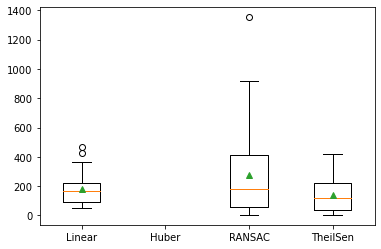

In [20]:
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
    # evaluate the model
    results[name] = evalute_model(X_train, Y_train, model, name)
    # summarize progress
    print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)

### Regression 1

In [21]:
reg = LinearRegression()
reg.fit(X_train,np.log(Y_train))

LinearRegression()

In [22]:
reg.score(X_test,np.log(Y_Test))

0.8658090616634333

In [23]:
np.round(np.exp(reg.predict(X_test)),2)

array([6.11200e+01, 6.40000e-01, 1.20900e+01, 4.80000e-01, 2.24559e+03,
       6.80000e-01, 1.29000e+00, 6.40000e-01, 4.80000e-01, 2.31270e+02,
       1.45000e+00, 1.54195e+03, 3.28200e+01, 2.60000e-01, 5.66400e+01,
       1.29000e+00, 5.60000e-01, 6.30000e-01, 4.80000e-01, 2.42500e+01,
       6.40000e-01, 3.06150e+02, 9.00000e-01, 7.00000e-01, 4.58200e+01,
       1.44900e+01, 2.40000e-01, 9.61000e+00, 5.41170e+02, 1.86900e+01,
       6.60000e-01, 2.54200e+02, 7.70000e-01, 8.50000e-01, 3.21900e+01,
       3.63900e+01, 2.50000e-01, 5.50000e-01, 6.20000e-01, 3.92800e+01,
       1.90000e-01, 5.90000e-01])

In [24]:
reg.coef_

array([ 4.02615794e+00, -2.27964453e-01, -5.46912125e-02,  3.73571141e-01,
       -9.94321930e-01,  6.18912093e-04, -1.50755142e-01,  2.81914010e-04,
       -3.39311680e-02])

### Regression 2

In [25]:
reg2 = LinearRegression()
reg2.fit(X_train,np.log(Y_train2))

LinearRegression()

In [26]:
reg2.fit(X_train,np.log(Y_train2))

LinearRegression()

In [27]:
np.exp(reg2.predict(X_test))

array([9.21511263e+01, 1.39948835e+00, 1.62073487e+01, 8.64871839e-01,
       2.24687603e+03, 1.40526950e+00, 2.67091515e+00, 1.30437984e+00,
       1.08653946e+00, 2.05447185e+02, 2.97582510e+00, 1.60433580e+03,
       5.06567398e+01, 5.43212799e-01, 9.32154982e+01, 2.67091515e+00,
       1.05446670e+00, 1.16188165e+00, 1.05592921e+00, 3.36188472e+01,
       1.39949650e+00, 2.82318577e+02, 1.90714249e+00, 1.27985944e+00,
       6.87401332e+01, 2.23225460e+01, 4.35621288e-01, 1.49163464e+01,
       4.75757820e+02, 3.13724417e+01, 1.20087037e+00, 2.34332170e+02,
       1.41114503e+00, 1.78131772e+00, 4.53119752e+01, 5.98931027e+01,
       5.63033820e-01, 1.02693325e+00, 1.20502367e+00, 5.38809701e+01,
       3.57167201e-01, 1.06119975e+00])

In [28]:
model1_data["Win_Bid"] = np.exp(reg.predict(X))
model1_data["DRL_Bid"] = np.exp(reg2.predict(X))

In [29]:
sum(model1_data["Winning_Price"]>model1_data["Win_Bid"])

102

In [30]:
sum(model1_data["Winning_Price"]>model1_data["DRL_Bid"])

65

<AxesSubplot:xlabel='DRL_Bid', ylabel='Density'>

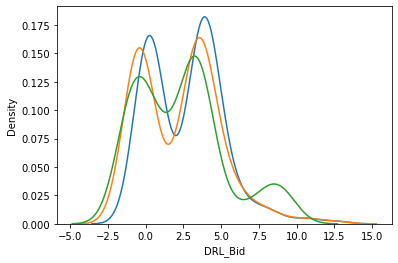

In [32]:
import seaborn as sns
sns.kdeplot(np.log(model1_data["DRL_Bid"]))
sns.kdeplot(np.log(model1_data["Win_Bid"]))
sns.kdeplot(np.log(model1_data["Winning_Price"]))

<AxesSubplot:xlabel='DRL_Bid', ylabel='Density'>

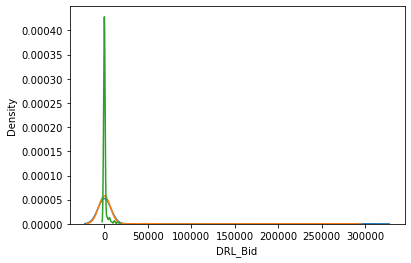

In [33]:
sns.kdeplot((model1_data["DRL_Bid"]))
sns.kdeplot((model1_data["Win_Bid"]))
sns.kdeplot((model1_data["Winning_Price"]))

In [34]:
model1_data.to_excel("Linear_Pred.xlsx")

In [35]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [36]:
mape(Y,np.exp(reg2.predict(X)))

1.603087573543069

In [37]:
mape(Y,np.exp(reg.predict(X)))

0.9979989249063351

In [38]:
mape(np.exp(reg2.predict(X)),np.exp(reg.predict(X)))

0.34450077815647895

(0.0, 15000.0)

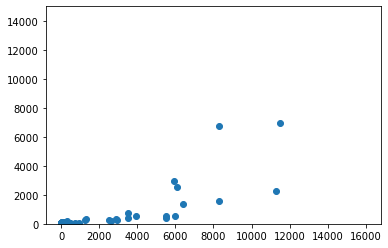

In [39]:
plt.plot(Y,np.exp(reg.predict(X)),"o")
plt.ylim(0,15000)

In [80]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [41]:
mean_absolute_percentage_error(Y,np.exp(reg2.predict(X)))

160.3087573543069

In [42]:
mean_absolute_percentage_error(Y,np.exp(reg.predict(X)))

99.79989249063351

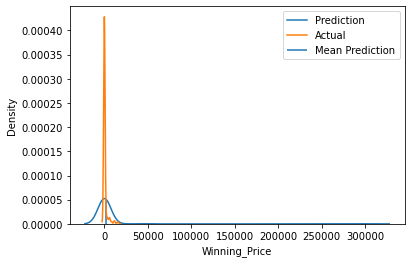

In [43]:
plt.vlines((np.mean(np.exp(reg2.predict(X)))),ymax=.00005,ymin=0,label="Mean Prediction")
sns.kdeplot((np.exp(reg2.predict(X))),label="Prediction")
sns.kdeplot((model1_data["Winning_Price"]),label="Actual")
plt.legend()

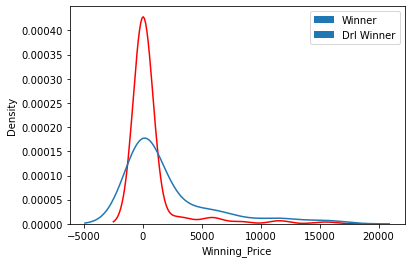

In [44]:
import matplotlib.patches as  mpatches
sns.kdeplot((model1_data["Winning_Price"]),label="Actual",color="red")
sns.kdeplot(model1_data[model1_data["DRL_Win_Flag"]==1]["Winning_Price"])
handles = [mpatches.Patch(label="Winner"),
           mpatches.Patch(label="Drl Winner")]
plt.legend(handles=handles)

<AxesSubplot:xlabel='Winning_Price', ylabel='Density'>

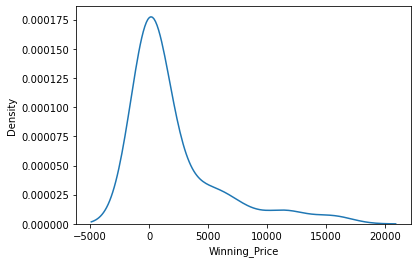

In [203]:
sns.kdeplot(model1_data[model1_data["DRL_Win_Flag"]==1]["Winning_Price"])

In [214]:
len(model1_data[model1_data["Winning_Price"]>100]["Winning_Price"])

29

In [216]:
len(model1_data[model1_data["Winning_Price"]<100])

177

In [46]:
min(model1_data[model1_data["DRL_Win_Flag"]==1]["Winning_Price"])

0.23

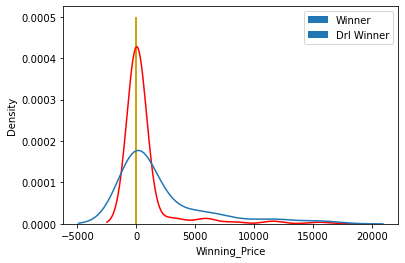

In [51]:
import matplotlib.patches as  mpatches
sns.kdeplot((model1_data["Winning_Price"]),label="Actual",color="red")
sns.kdeplot(model1_data[model1_data["DRL_Win_Flag"]==1]["Winning_Price"])
handles = [mpatches.Patch(label="Winner"),
           mpatches.Patch(label="Drl Winner")]
plt.legend(handles=handles)
plt.vlines(x=0.23,ymin=0,ymax=0.0005,color="green")
plt.vlines(x=min(model1_data["Winning_Price"]),ymin=0,ymax=0.0005,color="orange")

In [52]:
min(model1_data["Winning_Price"])

0.15609

<AxesSubplot:xlabel='Winning_Price', ylabel='Density'>

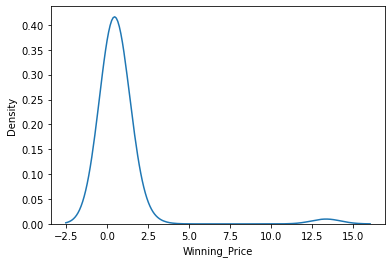

In [59]:
sns.kdeplot(model1_data[model1_data["DRL_Bid_price"]<1]["Winning_Price"])

In [57]:
sum(model1_data["Winning_Price"]<1)

63

## Model 1 to 50

In [143]:
model1_50=model1_data[(model1_data["Winning_Price"]>=1)&(model1_data["Winning_Price"]<50)]
model_1 = model1_data[model1_data["Winning_Price"]<1]

In [172]:
X_cols = ['Form', 'Region', ' Tender_Type',
       'Client', '#Participant', 'Proximity_Delivery',
       'Tender_Duration', 'Previous_Winning_Price', '#Months_G.E']
X = model1_50[X_cols]
Y = list(model1_50["Winning_Price"])
#X_train,X_test,Y_train,Y_Test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [145]:
reg = LinearRegression()
reg.fit(X,np.log(Y))

LinearRegression()

In [146]:
pd.DataFrame({"Actual":Y,"pred":np.exp(reg.predict(X))}).to_excel("Mean_Absolute_Prediction.xlsx")

PermissionError: [Errno 13] Permission denied: 'Mean_Absolute_Prediction.xlsx'

In [147]:
mean_absolute_percentage_error(Y,np.exp(reg.predict(X)))

35.94629268591237

In [121]:
# evaluate an ridge regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
# define model
model = Ridge(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, np.log(Y), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.628 (0.214)


In [122]:
model.fit(X,np.log(Y))

Ridge()

In [123]:
mean_absolute_percentage_error(Y,np.exp(model.predict(X)))

62.50678118950796

In [124]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, np.log(Y))
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.611
Config: {'alpha': 0.0}


In [127]:
model.fit(X,np.log(Y))

Ridge()

In [128]:
model.coef_

array([ 2.01310631e+00, -2.96287638e-01,  7.23182580e-02,  3.25697596e-01,
       -1.96025900e-01, -2.02492792e-04, -1.65462763e-01,  1.20021696e-03,
       -1.02972810e-02])

In [129]:
mean_absolute_percentage_error(Y,np.exp(model.predict(X)))

62.50678118950796

In [130]:
# grid search hyperparameters for ridge regression
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, np.log(Y))
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.611
Config: {'alpha': 0.0}


In [132]:
from sklearn.linear_model import ElasticNet
# define model
model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, np.log(Y))
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.611
Config: {'alpha': 0.0, 'l1_ratio': 0.0}


In [138]:
# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 

 
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models

In [139]:
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores

>Linear 8.952 (3.461)
>Huber 9.135 (4.354)
>RANSAC 12.105 (11.774)
>TheilSen 10.478 (9.556)


{'whiskers': [<matplotlib.lines.Line2D at 0x1ceb4ba5910>,
 'caps': [<matplotlib.lines.Line2D at 0x1ceb4ba5fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ceb4ba5e50>,
 'medians': [<matplotlib.lines.Line2D at 0x1ceb4d2bfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ceb3bd0cd0>,
 'means': [<matplotlib.lines.Line2D at 0x1ceb3bd0250>,
  <matplotlib.lines.Line2D at 0x1ceb4b52400>]}

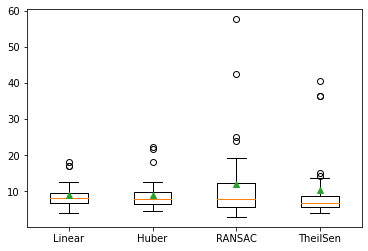

In [141]:
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
    # evaluate the model
    results[name] = evalute_model(X, Y, model, name)
    # summarize progress
    print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)

In [182]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

In [183]:
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -4.615 (1.794)


In [184]:
model.fit(X,Y)

RandomForestRegressor()

In [185]:
model.predict(X)

array([ 2.1033008,  2.5604608, 10.8493096,  2.5804006,  2.1768105,
        2.162    ,  2.0107997,  1.6318187,  1.5348594,  1.5487088,
       10.8493096,  2.5804006,  2.1768105,  2.162    ,  2.0107997,
        1.6318187,  1.5348594,  1.5487088,  2.4831688,  1.8232997,
       14.3800345,  4.0157221,  3.3397221,  3.1905884,  4.2112997,
        2.6199102,  2.5515997,  4.7178112,  1.984158 , 38.1193946,
       39.6415669, 34.1312236, 29.1921902, 35.5402572, 41.2152435,
       37.1832168, 29.2480032, 26.5676022, 31.1024161, 38.2726242,
       35.2425238, 30.8920202, 39.5706213, 39.6302407, 31.6178758,
       34.4991989, 39.1615054, 40.4026251, 35.5351821, 30.1075874,
       31.8837165, 29.9130836, 28.6952519, 24.2745122, 27.0384838,
       17.0625673, 10.5846267,  6.9431895,  5.893    , 36.4128838,
       38.584893 , 30.4093716, 24.2983307, 20.9908087, 26.4106867,
       25.5700883, 17.265545 , 26.6474459, 22.7558431, 25.456355 ,
       23.8564231, 20.0854489, 18.8386394, 13.9550091, 18.4267

In [186]:
mean_absolute_percentage_error(Y,model.predict(X))

11.009999172560484

In [192]:
dh.winprob_data_processor(dh.previous_winning_price(dh.encoded_df(model_data)),DRL_Participation=True)

(207, 11)


,Identifier,DRL_Win_Flag,Form,Region,Tender_Type,Client,#Participant,Proximity_Delivery,Tender_Duration,Previous_Winning_Price,#Months_G.E
19,CINACALCET 30MG84724,0,1,3,1,2,2,0.266667,1.106742,0.36800,0.466667
20,CINACALCET 30MG85261,0,1,2,2,2,2,0.266667,0.769663,0.36800,0.933333
21,CINACALCET 30MG85386,1,1,3,2,1,1,0.533333,1.794944,0.41587,1.100000
22,CINACALCET 30MG86307,0,1,2,1,1,2,2.400000,4.362360,0.67860,3.433333
46,CINACALCET 60MG84724,0,1,3,1,2,2,0.266667,1.106742,0.67900,0.466667
...,...,...,...,...,...,...,...,...,...,...,...
795,IMATINIB 100MG78730,0,1,3,1,2,2,9.733333,3.073034,12.50000,24.366667
797,IMATINIB 100MG81522,1,1,3,2,2,1,2.333333,4.101124,0.22850,29.466667
805,IMATINIB 100MG92526,0,1,3,1,2,2,1.833333,3.075843,0.23497,43.766667
806,IMATINIB 100MG92618,0,1,4,1,2,2,4.033333,1.264045,0.24550,44.333333


In [190]:
%load_ext autoreload
%autoreload 2

In [194]:
model1_data.to_excel("PriceEstimationData.xlsx")